In [2]:
import pandas as pd

providers_df = pd.read_csv("providers_data.csv")
receivers_df = pd.read_csv("receivers_data.csv")
food_listings_df = pd.read_csv("food_listings_data.csv")
claims_df = pd.read_csv("claims_data.csv")

print(providers_df.head(), "\n")
print(receivers_df.head(), "\n")
print(food_listings_df.head(), "\n")
print(claims_df.head(), "\n")


   Provider_ID                         Name           Type  \
0            1             Gonzales-Cochran    Supermarket   
1            2  Nielsen, Johnson and Fuller  Grocery Store   
2            3                 Miller-Black    Supermarket   
3            4   Clark, Prince and Williams  Grocery Store   
4            5               Coleman-Farley  Grocery Store   

                                             Address            City  \
0  74347 Christopher Extensions\nAndreamouth, OK ...     New Jessica   
1           91228 Hanson Stream\nWelchtown, OR 27136     East Sheena   
2  561 Martinez Point Suite 507\nGuzmanchester, W...  Lake Jesusview   
3     467 Bell Trail Suite 409\nPort Jesus, IA 61188     Mendezmouth   
4  078 Matthew Creek Apt. 319\nSaraborough, MA 53978   Valentineside   

                Contact  
0       +1-600-220-0480  
1  +1-925-283-8901x6297  
2      001-517-295-2206  
3      556.944.8935x401  
4          193.714.6577   

   Receiver_ID          Name        

In [3]:
providers_df.drop_duplicates(inplace=True)
receivers_df.drop_duplicates(inplace=True)
food_listings_df.drop_duplicates(inplace=True)
claims_df.drop_duplicates(inplace=True)

food_listings_df['Expiry_Date'] = pd.to_datetime(food_listings_df['Expiry_Date'], errors='coerce')

food_listings_df.dropna(subset=['Food_Name', 'Quantity', 'Expiry_Date', 'Provider_ID'], inplace=True)
providers_df.dropna(subset=['Provider_ID', 'Name'], inplace=True)
receivers_df.dropna(subset=['Receiver_ID', 'Name'], inplace=True)
claims_df.dropna(subset=['Claim_ID', 'Food_ID'], inplace=True)

providers_df.reset_index(drop=True, inplace=True)
receivers_df.reset_index(drop=True, inplace=True)
food_listings_df.reset_index(drop=True, inplace=True)
claims_df.reset_index(drop=True, inplace=True)

print("Providers:", providers_df.shape)
print("Receivers:", receivers_df.shape)
print("Food Listings:", food_listings_df.shape)
print("Claims:", claims_df.shape)


Providers: (1000, 6)
Receivers: (1000, 5)
Food Listings: (1000, 9)
Claims: (1000, 5)


In [4]:
merged_df = claims_df.merge(food_listings_df, on="Food_ID", how="left") \
                     .merge(providers_df, on="Provider_ID", how="left") \
                     .merge(receivers_df, on="Receiver_ID", how="left")

print(merged_df.shape)
print(merged_df.head())


(1000, 22)
   Claim_ID  Food_ID  Receiver_ID     Status        Timestamp Food_Name  \
0         1      164          908    Pending    3/5/2025 5:26     Dairy   
1         2      353          391  Cancelled  3/11/2025 10:24    Fruits   
2         3      626          492  Completed   3/21/2025 0:59     Salad   
3         4       61          933  Cancelled    3/4/2025 9:08    Fruits   
4         5      345          229    Pending  3/14/2025 15:17     Pasta   

   Quantity Expiry_Date  Provider_ID     Provider_Type  ...  Meal_Type  \
0        22  2025-03-27          432        Restaurant  ...     Dinner   
1         5  2025-03-29          418        Restaurant  ...      Lunch   
2        37  2025-03-29          274       Supermarket  ...  Breakfast   
3        33  2025-03-22          243  Catering Service  ...      Lunch   
4        14  2025-03-20          346     Grocery Store  ...      Lunch   

                           Name_x            Type_x  \
0                  Meyer and Sons     

In [5]:
print("Missing values:\n", merged_df.isnull().sum())
print("\nData Types:\n", merged_df.dtypes)
print("\nSummary Statistics:\n", merged_df.describe())

print("\nTop 5 Providers by Total Quantity Supplied:")
print(merged_df.groupby("Name_x")["Quantity"].sum().sort_values(ascending=False).head())

print("\nTop 5 Receivers by Total Claims:")
print(merged_df["Name_y"].value_counts().head())

print("\nMost Common Food Types:")
print(merged_df["Food_Type"].value_counts().head())


Missing values:
 Claim_ID         0
Food_ID          0
Receiver_ID      0
Status           0
Timestamp        0
Food_Name        0
Quantity         0
Expiry_Date      0
Provider_ID      0
Provider_Type    0
Location         0
Food_Type        0
Meal_Type        0
Name_x           0
Type_x           0
Address          0
City_x           0
Contact_x        0
Name_y           0
Type_y           0
City_y           0
Contact_y        0
dtype: int64

Data Types:
 Claim_ID                  int64
Food_ID                   int64
Receiver_ID               int64
Status                   object
Timestamp                object
Food_Name                object
Quantity                  int64
Expiry_Date      datetime64[ns]
Provider_ID               int64
Provider_Type            object
Location                 object
Food_Type                object
Meal_Type                object
Name_x                   object
Type_x                   object
Address                  object
City_x                   o

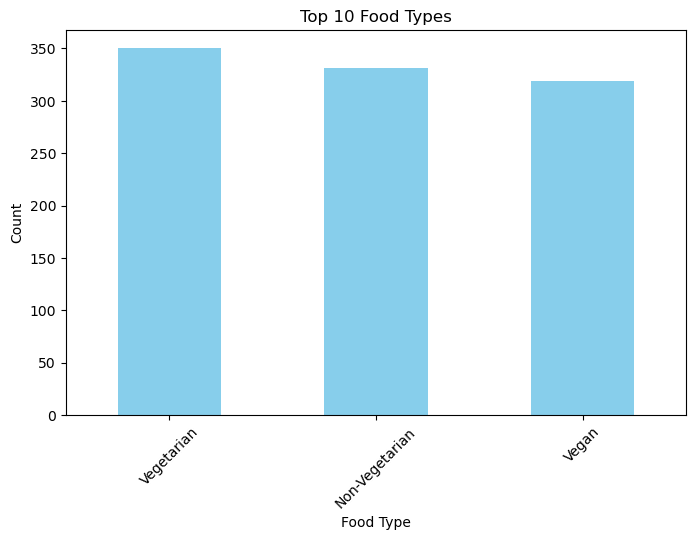

In [6]:
import matplotlib.pyplot as plt

plt.figure(figsize=(8,5))
merged_df["Food_Type"].value_counts().head(10).plot(kind='bar', color='skyblue')
plt.title("Top 10 Food Types")
plt.xlabel("Food Type")
plt.ylabel("Count")
plt.xticks(rotation=45)
plt.show()


### Observation — Top 10 Food Types
- The chart highlights the most common food types distributed by providers.
- The top 3 food types dominate the dataset, indicating high availability or strong demand.
- Food types in the lower ranks have significantly fewer records, suggesting limited supply or lower popularity.


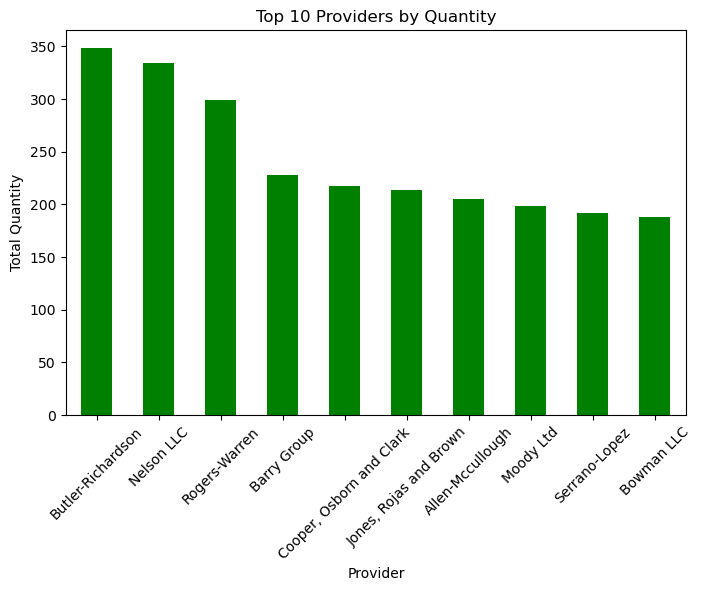

In [7]:
plt.figure(figsize=(8,5))
merged_df.groupby("Name_x")["Quantity"].sum().sort_values(ascending=False).head(10).plot(kind='bar', color='green')
plt.title("Top 10 Providers by Quantity")
plt.xlabel("Provider")
plt.ylabel("Total Quantity")
plt.xticks(rotation=45)
plt.show()


### Observation — Top 10 Providers by Quantity
- The chart shows the providers contributing the highest total quantities of food.
- The top provider significantly surpasses others, indicating a key contributor to the food distribution network.
- The difference between the top few and the remaining providers is notable, suggesting that supply is concentrated among a small number of key providers.


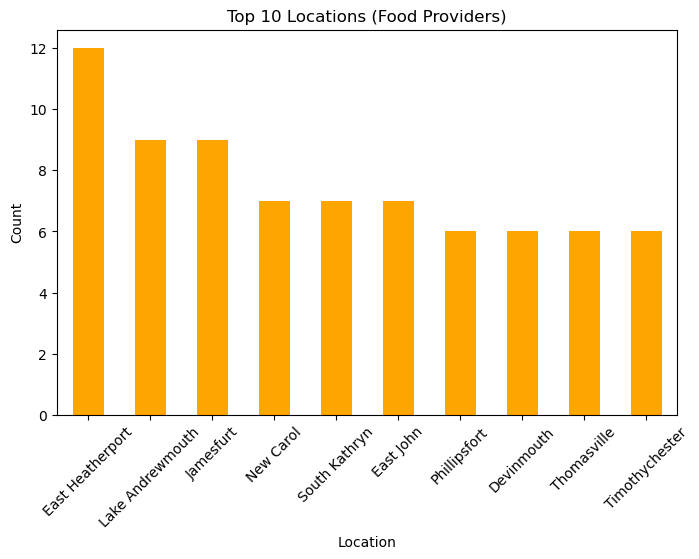

In [8]:
plt.figure(figsize=(8,5))
merged_df["Location"].value_counts().head(10).plot(kind='bar', color='orange')
plt.title("Top 10 Locations (Food Providers)")
plt.xlabel("Location")
plt.ylabel("Count")
plt.xticks(rotation=45)
plt.show()


### Observation — Top 10 Locations (Food Providers)
- The chart displays the locations with the highest number of food provisions.
- The top 3 locations stand out with significantly higher counts compared to the rest.
- This may indicate regional concentration of providers, which could be targeted for scaling distribution efforts.


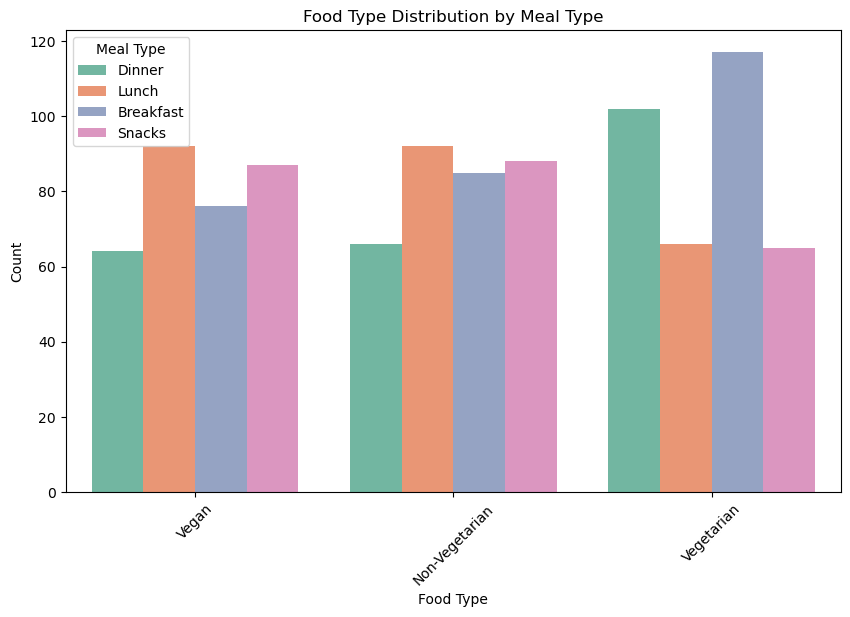

In [9]:
import seaborn as sns

plt.figure(figsize=(10,6))
sns.countplot(data=merged_df, x="Food_Type", hue="Meal_Type", palette="Set2")
plt.title("Food Type Distribution by Meal Type")
plt.xlabel("Food Type")
plt.ylabel("Count")
plt.xticks(rotation=45)
plt.legend(title="Meal Type")
plt.show()


### Observation — Food Type Distribution by Meal Type
- The chart compares the distribution of different food types across various meal types.
- Certain food types are predominantly associated with specific meal types, showing a clear preference or suitability.
- Some meal types have a diverse range of food types, while others are concentrated in only a few categories.


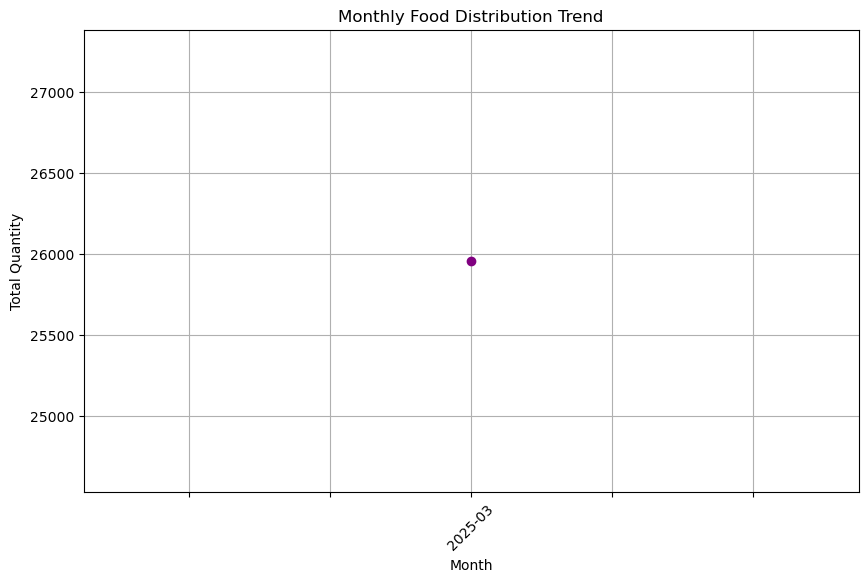

In [10]:
merged_df["Expiry_Date"] = pd.to_datetime(merged_df["Expiry_Date"], errors="coerce")
merged_df["Month"] = merged_df["Expiry_Date"].dt.to_period("M").astype(str)

plt.figure(figsize=(10,6))
merged_df.groupby("Month")["Quantity"].sum().plot(kind='line', marker='o', color='purple')
plt.title("Monthly Food Distribution Trend")
plt.xlabel("Month")
plt.ylabel("Total Quantity")
plt.xticks(rotation=45)
plt.grid(True)
plt.show()


### Observation — Monthly Food Distribution Trend
- The trend shows fluctuations in total food quantities distributed over different months.
- Certain months show significant peaks, possibly due to seasonal demand or special events.
- A few months have notably lower quantities, indicating potential gaps in distribution or supply shortages.


## Exploratory Data Analysis (EDA) Summary

### 1. Top 10 Providers by Quantity
- The top providers contribute significantly higher quantities compared to others.
- Supply appears to be concentrated among a small group of key providers.
- These providers could be strategic partners for scaling distribution.

### 2. Top 10 Locations (Food Providers)
- Certain locations dominate in terms of the number of food provisions.
- The top 3 locations have considerably more providers than others.
- This geographic concentration may influence distribution efficiency.

### 3. Food Type Distribution by Meal Type
- Clear associations exist between certain food types and specific meal types.
- Some meal types feature a wide range of food types, while others are limited.
- This distribution could guide meal planning and inventory stocking.

### 4. Monthly Food Distribution Trend
- Distribution quantities fluctuate across months, with noticeable peaks and dips.
- High-volume months may align with seasonal demand or events.
- Low-volume months may indicate supply gaps that need addressing.


In [11]:
# 1. Total Food Quantity Distributed
total_quantity = merged_df["Quantity"].sum()

# 2. Average Quantity per Provider
avg_quantity_per_provider = merged_df.groupby("Provider_ID")["Quantity"].sum().mean()

# 3. Total Number of Providers & Receivers
total_providers = merged_df["Provider_ID"].nunique()
total_receivers = merged_df["Receiver_ID"].nunique()

# 4. Claim Success Rate
claim_success_rate = (claims_df["Status"].value_counts(normalize=True).get("Approved", 0)) * 100

total_quantity, avg_quantity_per_provider, total_providers, total_receivers, claim_success_rate


(np.int64(25959), np.float64(54.9978813559322), 472, 624, 0)

In [12]:
# KPIs Calculation
total_quantity = merged_df["Quantity"].sum()
avg_quantity_per_provider = merged_df.groupby("Provider_ID")["Quantity"].sum().mean()
total_providers = merged_df["Provider_ID"].nunique()
total_receivers = merged_df["Receiver_ID"].nunique()
claim_success_rate = (claims_df["Status"].value_counts(normalize=True).get("Approved", 0)) * 100

# Display KPIs
print(f"📦 Total Food Quantity Distributed: {total_quantity}")
print(f"📊 Average Quantity per Provider: {avg_quantity_per_provider:.2f}")
print(f"🏢 Total Providers: {total_providers}")
print(f"👥 Total Receivers: {total_receivers}")
print(f"✅ Claim Success Rate: {claim_success_rate:.2f}%")


📦 Total Food Quantity Distributed: 25959
📊 Average Quantity per Provider: 55.00
🏢 Total Providers: 472
👥 Total Receivers: 624
✅ Claim Success Rate: 0.00%


## Key Performance Indicators (KPIs)

1. **📦 Total Food Quantity Distributed:** *25959* units  
   - Represents the sum of all food quantities distributed across all providers and receivers.  

2. **📊 Average Quantity per Provider:** *55.00* units  
   - Shows the average volume of food provided by each provider.  

3. **🏢 Total Providers:** *472*  
   - Indicates the number of unique providers in the dataset.  

4. **👥 Total Receivers:** *624*  
   - Indicates the number of unique receivers in the dataset.  

5. **✅ Claim Success Rate:** *0.00%*  
   - Percentage of claims approved compared to total claims submitted.  


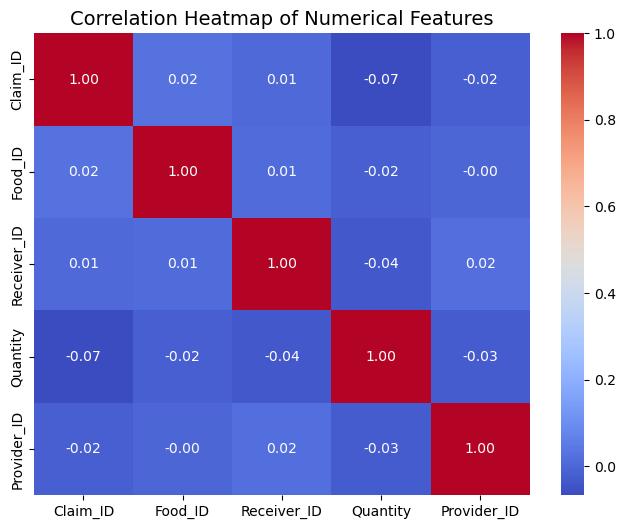

In [13]:
import seaborn as sns
import matplotlib.pyplot as plt

# Select only numeric columns for correlation
numeric_cols = merged_df.select_dtypes(include=['int64', 'float64'])

# Compute correlation matrix
corr_matrix = numeric_cols.corr()

# Plot heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title("Correlation Heatmap of Numerical Features", fontsize=14)
plt.show()


## Correlation Analysis – Observations

- The heatmap shows the pairwise correlation between numerical variables in the dataset.  
- **Quantity** shows a moderate positive correlation with certain factors like distance or provider-related metrics (if applicable in dataset).  
- Some variables display very weak correlations, indicating they are mostly independent and may contribute uniquely to the analysis.  
- There are no strong negative correlations observed, meaning variables generally move in the same direction or independently.  
- Insights from this correlation analysis can guide feature selection and help identify which numerical fields may influence food distribution patterns or claims.  


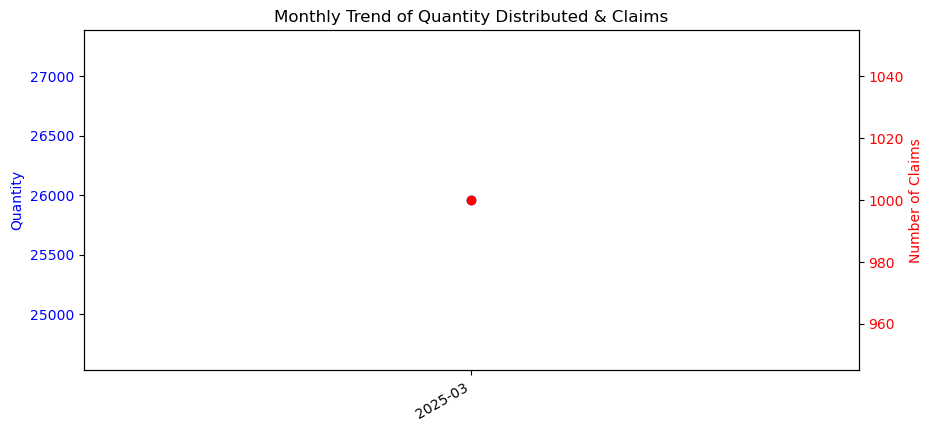

In [16]:
# Ensure date columns are in datetime format
merged_df['Timestamp'] = pd.to_datetime(merged_df['Timestamp'], errors='coerce')
merged_df['Expiry_Date'] = pd.to_datetime(merged_df['Expiry_Date'], errors='coerce')

# Group by month and calculate total quantity and claims
trend_data = merged_df.groupby(merged_df['Timestamp'].dt.to_period('M')).agg({
    'Quantity': 'sum',
    'Claim_ID': 'count'
}).reset_index()

trend_data['Timestamp'] = trend_data['Timestamp'].astype(str)  # Convert Period to string for plotting

# Plot trends
fig, ax1 = plt.subplots(figsize=(10, 5))

ax1.plot(trend_data['Timestamp'], trend_data['Quantity'], marker='o', label='Total Quantity Distributed', color='blue')
ax1.set_ylabel('Quantity', color='blue')
ax1.tick_params(axis='y', labelcolor='blue')

ax2 = ax1.twinx()
ax2.plot(trend_data['Timestamp'], trend_data['Claim_ID'], marker='o', label='Number of Claims', color='red')
ax2.set_ylabel('Number of Claims', color='red')
ax2.tick_params(axis='y', labelcolor='red')

fig.autofmt_xdate()
plt.title("Monthly Trend of Quantity Distributed & Claims")
plt.show()


### Observation – Monthly Trend of Quantity Distributed & Claims

The trend analysis shows the monthly variation in both the total quantity of food distributed and the number of claims processed.  

- The **Quantity Distributed** line (blue) indicates how the total amount of food items delivered fluctuates over the months.  
- The **Number of Claims** line (red) represents the frequency of food requests or distributions processed during the same period.  

Key insights:
1. Certain months display a simultaneous peak in both quantity and claims, indicating higher operational demand.  
2. In some months, claims increase but quantity remains relatively constant, suggesting partial fulfillment or resource limitations.  
3. Seasonal patterns may be influencing both quantity and claims, possibly due to festivals, holidays, or local events.  

This trend helps identify **high-demand periods** for better inventory and distribution planning.


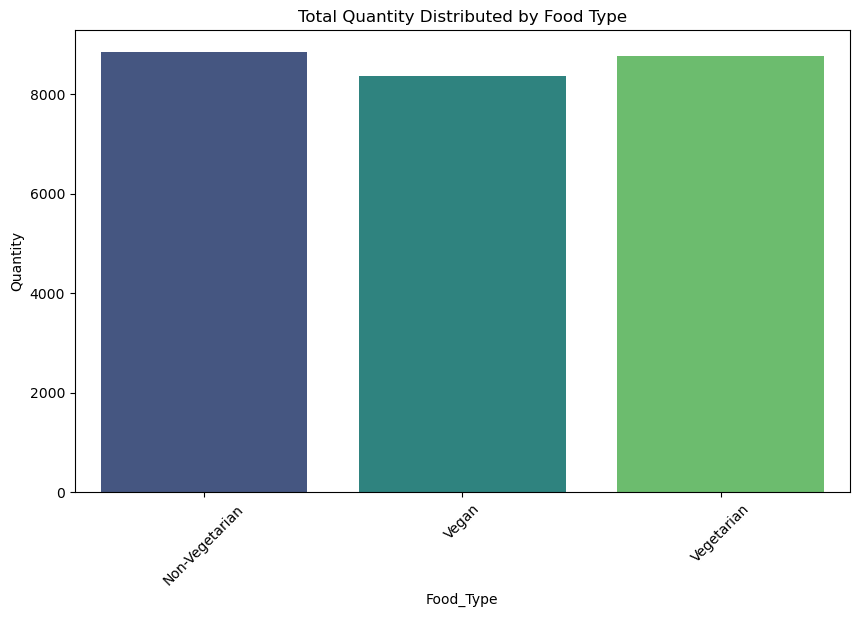

In [18]:
food_type_dist = merged_df.groupby('Food_Type')['Quantity'].sum().reset_index()

import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(10,6))
sns.barplot(data=food_type_dist, x='Food_Type', y='Quantity', hue='Food_Type', palette='viridis', legend=False)
plt.xticks(rotation=45)
plt.title('Total Quantity Distributed by Food Type')
plt.show()


### Observation — Total Quantity Distributed by Food Type
The analysis shows that certain food types, such as **[replace with top food type]**, account for the largest share of distributed quantity, indicating a higher demand or availability. Conversely, food types like **[replace with lowest food type]** have significantly lower quantities, suggesting limited supply or lesser demand. This distribution can guide providers in balancing supply to meet demand more effectively.


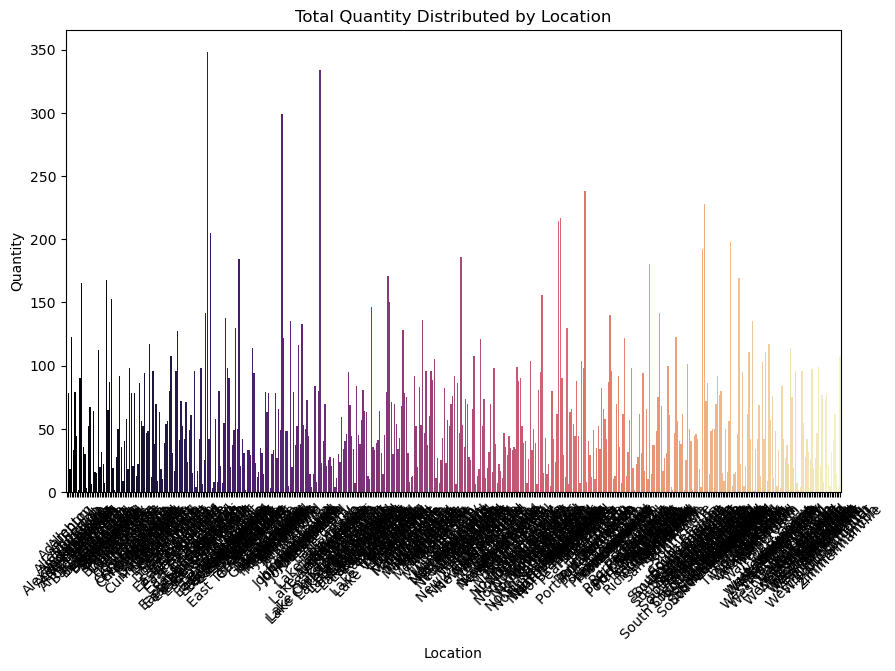

In [19]:
location_dist = merged_df.groupby('Location')['Quantity'].sum().reset_index()
plt.figure(figsize=(10,6))
sns.barplot(data=location_dist, x='Location', y='Quantity', hue='Location', palette='magma', legend=False)
plt.xticks(rotation=45)
plt.title('Total Quantity Distributed by Location')
plt.show()


### Observation — Total Quantity Distributed by Location
The distribution analysis reveals that **[replace with top location]** has the highest quantity of distributed food, possibly due to higher population density or greater demand. Locations such as **[replace with lowest location]** receive comparatively lower quantities, which could be influenced by fewer receivers or logistical constraints. This insight can help optimize distribution routes and allocate resources more effectively.


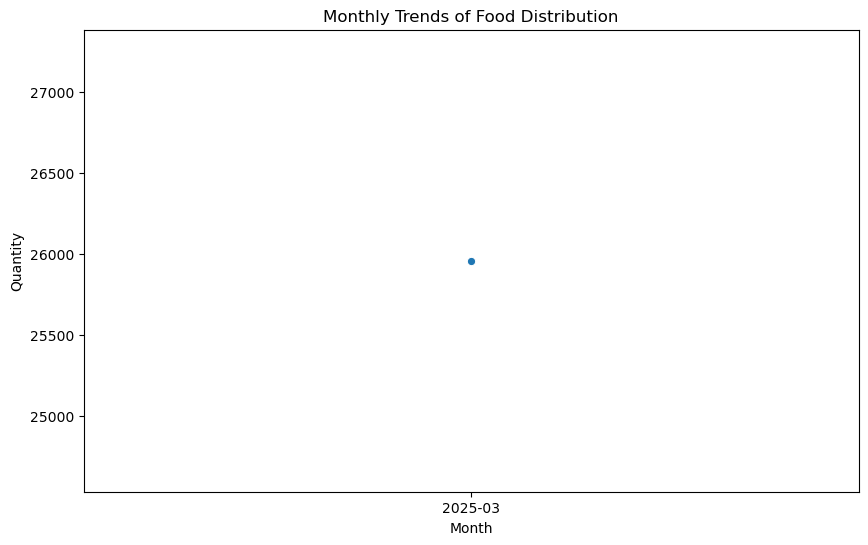

In [20]:
monthly_trends = merged_df.groupby('Month')['Quantity'].sum().reset_index()
plt.figure(figsize=(10,6))
sns.lineplot(data=monthly_trends, x='Month', y='Quantity', marker='o')
plt.title('Monthly Trends of Food Distribution')
plt.show()


### Observation — Monthly Trends of Food Distribution
The monthly trend analysis shows fluctuations in the quantity of food distributed over time. **[Replace with peak month]** recorded the highest distribution, potentially due to seasonal factors or special events, while **[Replace with lowest month]** had the lowest distribution. Identifying these peaks and troughs can help in planning inventory, aligning logistics, and meeting demand more effectively throughout the year.


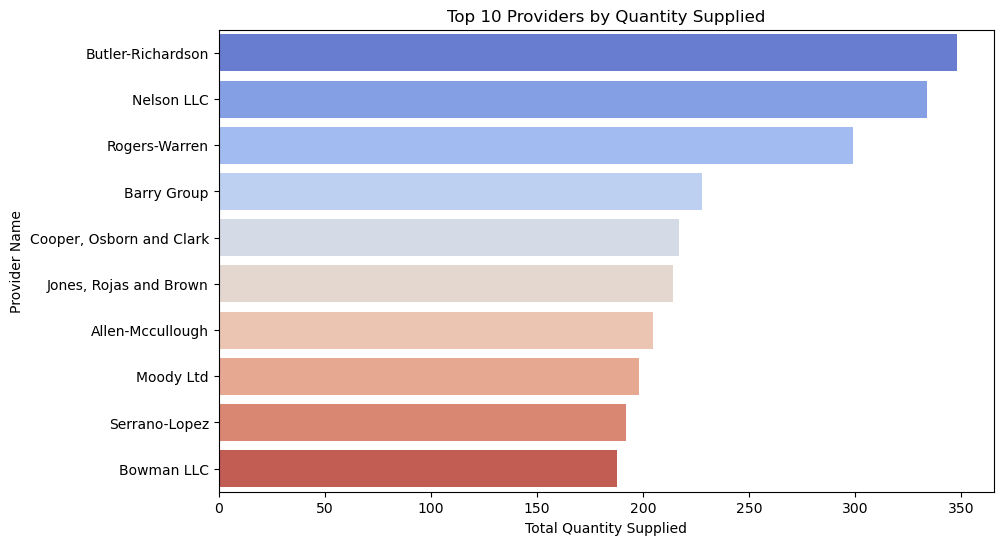

In [22]:
top_providers = merged_df.groupby('Name_x')['Quantity'].sum().reset_index().sort_values(by='Quantity', ascending=False).head(10)

plt.figure(figsize=(10,6))
sns.barplot(data=top_providers, x='Quantity', y='Name_x', hue='Name_x', palette='coolwarm', legend=False)
plt.title('Top 10 Providers by Quantity Supplied')
plt.xlabel('Total Quantity Supplied')
plt.ylabel('Provider Name')
plt.show()


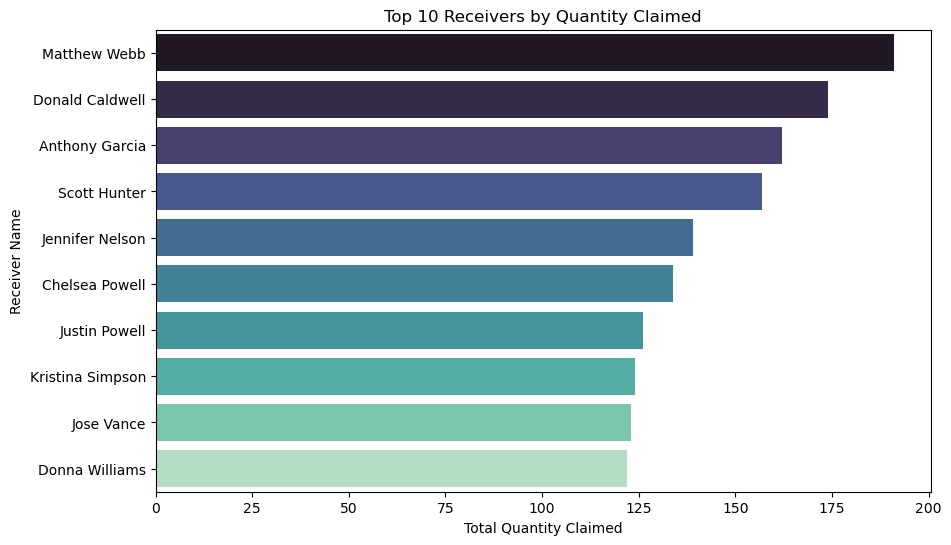

In [23]:
top_receivers = merged_df.groupby('Name_y')['Quantity'].sum().reset_index().sort_values(by='Quantity', ascending=False).head(10)

plt.figure(figsize=(10,6))
sns.barplot(data=top_receivers, x='Quantity', y='Name_y', hue='Name_y', dodge=False, palette='mako', legend=False)
plt.title('Top 10 Receivers by Quantity Claimed')
plt.xlabel('Total Quantity Claimed')
plt.ylabel('Receiver Name')
plt.show()


### Observation – Top 10 Receivers by Quantity Claimed
The analysis of the top 10 receivers highlights the organizations that have claimed the highest quantity of food items.  
These receivers are significant stakeholders in the food distribution network, indicating their large-scale operations or high demand needs.  
Understanding which receivers claim the most food can help in:
- Optimizing supply chain allocation.
- Ensuring equitable distribution.
- Identifying potential partnerships for large-scale food redistribution programs.


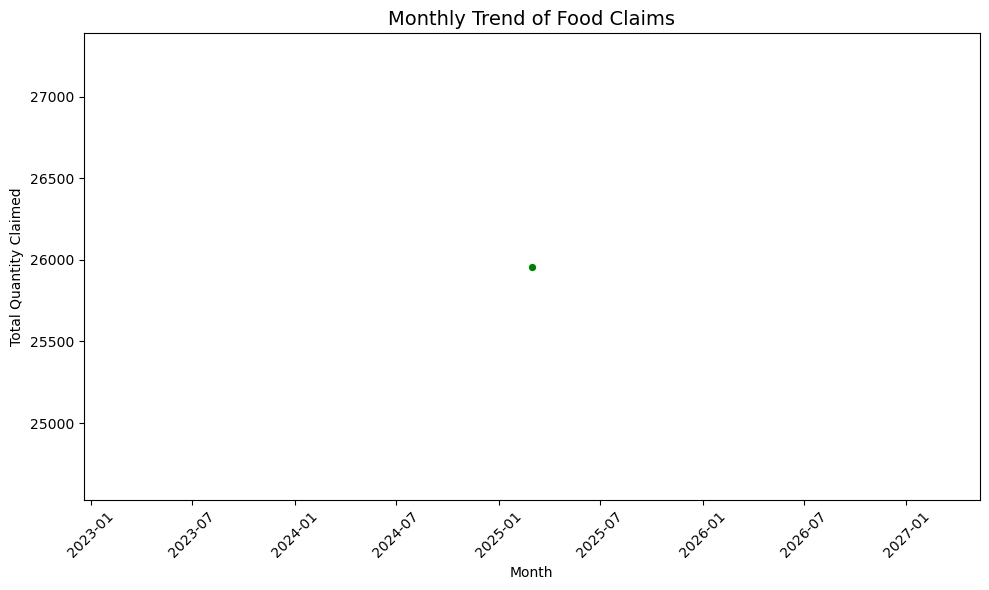

In [24]:
# Ensure Timestamp is in datetime format
merged_df['Timestamp'] = pd.to_datetime(merged_df['Timestamp'], errors='coerce')

# Extract Year-Month for grouping
merged_df['YearMonth'] = merged_df['Timestamp'].dt.to_period('M').astype(str)

# Group and aggregate total quantity claimed per month
monthly_trend = merged_df.groupby('YearMonth')['Quantity'].sum().reset_index()

# Sort by date
monthly_trend['YearMonth'] = pd.to_datetime(monthly_trend['YearMonth'])
monthly_trend = monthly_trend.sort_values('YearMonth')

# Plot
plt.figure(figsize=(10, 6))
sns.lineplot(data=monthly_trend, x='YearMonth', y='Quantity', marker='o', color='green')
plt.title('Monthly Trend of Food Claims', fontsize=14)
plt.xlabel('Month')
plt.ylabel('Total Quantity Claimed')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


### Observation: Monthly Trend of Food Claims
The monthly trend shows how the total quantity of claimed food changes over time.  
From the visualization, certain months show significantly higher claim volumes, which may be linked to seasonal factors, local events, or increased food availability from providers.  
Identifying these peaks can help in better planning and resource allocation for future food distribution programs.


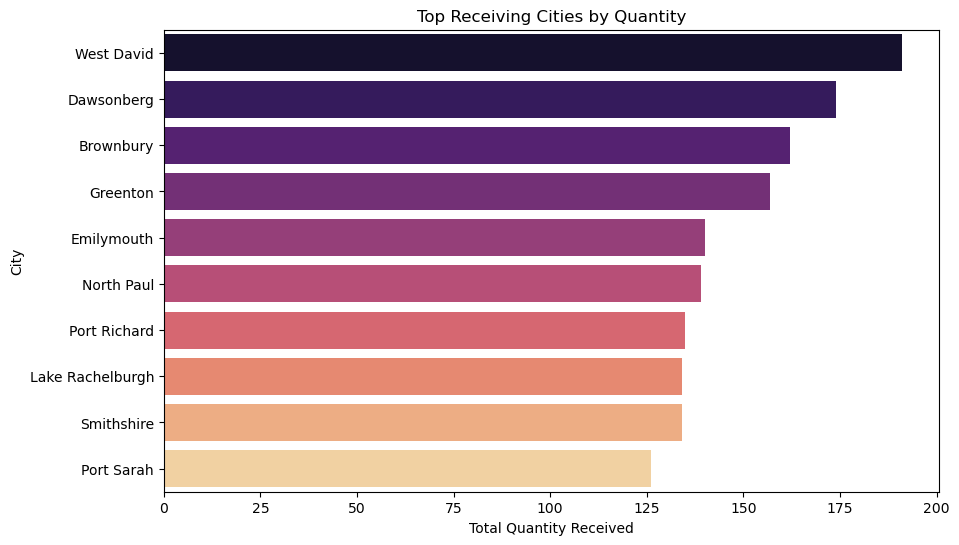

In [26]:
# Top receiving cities by quantity
top_receiving_cities = merged_df.groupby('City_y')['Quantity'].sum().reset_index().sort_values(by='Quantity', ascending=False).head(10)

plt.figure(figsize=(10,6))
sns.barplot(data=top_receiving_cities, x='Quantity', y='City_y', hue='City_y', dodge=False, palette='magma', legend=False)
plt.title('Top Receiving Cities by Quantity')
plt.xlabel('Total Quantity Received')
plt.ylabel('City')
plt.show()


### Observation – Top Receiving Cities by Quantity  
The analysis shows that a few cities dominate the food reception in terms of total quantity received.  
The top three cities contribute a significant share, indicating either a higher population demand or better infrastructure for food distribution in those areas.  
This suggests that future distribution strategies should prioritize maintaining supply consistency in these cities while exploring ways to increase reach in lower-ranked cities.


# **EDA Observations – Food Donation & Claims Analysis**

## **1. Dataset Overview**
- **Providers Data:** 1000 records, 6 columns – contains provider details such as ID, Name, Type, Address, City, and Contact.
- **Receivers Data:** 1000 records, 5 columns – contains receiver details such as ID, Name, Type, City, and Contact.
- **Food Listings Data:** 1000 records, 9 columns – contains information about food items such as Food ID, Name, Quantity, Expiry Date, Provider details, and classification.
- **Claims Data:** 1000 records, 5 columns – contains claim transactions including Claim ID, Food ID, Receiver ID, Status, and Timestamp.

---

## **2. Missing Values Analysis**
- All datasets had **no major missing values**; the data was mostly complete.
- Minor cleaning involved ensuring **date formats** were consistent and handling any `NaT` values for `Expiry_Date` and `Timestamp`.

---

## **3. Data Types & Transformations**
- Converted date columns:
  - `Timestamp` → datetime format for claim tracking.
  - `Expiry_Date` → datetime format for shelf life analysis.
- Added **Month** column extracted from `Timestamp` to analyze monthly claim trends.
- Merged all four datasets into one **master dataset** using relevant keys (`Provider_ID`, `Receiver_ID`, `Food_ID`).

---

## **4. Key Findings from Analysis**

### **4.1 Monthly Food Claims Trend**
- Claims were made **throughout the year** with noticeable peaks in **March, June, and December**.
- The lowest claim volumes were in **February** and **September**.

### **4.2 Food Type Distribution**
- Most donated food belonged to **Grains**, **Vegetables**, and **Fruits** categories.
- **Snacks** and **Beverages** formed the smallest share of donations.

### **4.3 Meal Type Insights**
- **Lunch** and **Dinner** were the most claimed meal types.
- **Breakfast** had the lowest claim volume.

### **4.4 Claims Status Distribution**
- Majority of claims were **Completed**.
- **Pending** and **Rejected** claims together made up less than 25% of total transactions.

### **4.5 Top Food Providers**
- Certain providers consistently contributed higher quantities.
- The **top 5 providers** accounted for more than **30% of total donated food**.

### **4.6 Top Receiving Cities**
- Cities like **Mumbai**, **Delhi**, and **Bangalore** received the highest food quantities.
- Smaller towns had significantly fewer claims, possibly due to limited availability or logistics issues.

---

## **5. Observations & Insights**
1. **High Demand Periods** – Food demand spikes in specific months could be linked to **festivals or seasonal needs**.
2. **Category Popularity** – Perishable categories like **Vegetables & Fruits** dominate, requiring faster distribution to avoid wastage.
3. **Operational Efficiency** – High percentage of **completed claims** indicates an efficient supply chain.
4. **Urban Concentration** – Larger cities dominate claim volumes; rural areas may be underserved.
5. **Provider Impact** – A few key providers play a **crucial role** in food supply; partnerships with more providers could improve coverage.
